In [189]:
import numpy as np
import pandas as pd                  #"""importing libraries"""
import random 
import matplotlib.pyplot as plt
df = pd.read_csv("BCW.csv")          #"""read data in dataframe"""
df = df.interpolate()
Y = np.array(df['class'])
Yt = np.transpose(Y)
df = df.drop(['ID'], axis=1)
dfb = np.array(df)
df = df.drop(['class'], axis=1)
X = np.array(df)                     #"""convert dataframe into matrix follwed by adding bias"""
b = np.full((len(Yt),1), -1)
X = np.append(X, b, axis=1)

In [190]:
def svm_train(X, Y):                 #"""Training function for SVM"""
    w = np.zeros(X[0].size)
    eta = 1
    n = 10000

    for epoch in range(1,n):
        for i, x in enumerate(X):
            if (Y[i]*np.dot(X[i],w)) < 1:
                w = w + eta * ( (Y[i]*X[i]) + (-2  *(1/epoch)* w) )
            else:
                w = w + eta * (-2  *(1/epoch)* w)

    return w

def svm_test(X,w) :                   #"""Testing function returns predicted values """
    #w = svm_train(X,Y)
    Yp = np.dot(X,w)
    return Yp;

In [191]:
def K_fold(X,Y,k):                    #"""K-fold function where k represents number of groups"""
    Ypk = []
    for i in range(1,k+1) :
        tstX, trnX = fold_i_of_X(X, i, k)
        tstY, trnY = fold_i_of_X(Y, i, k)
        w = svm_train(trnX,trnY)
        Ypi = svm_test(tstX,w)
        Ypk.extend(Ypi)               #"""return predicted values for whole dataset"""
    return Ypk;

def fold_i_of_X(X, i, k):             #"""fold function return data in i-th fold and remaning data"""
    n = len(X)
    return X[n*(i-1)//k:n*i//k], np.delete(X,slice(n*(i-1)//k,n*i//k), 0) ;

In [192]:
def boot_strap(df):                   #"""bootstrap function takes data with class value"""
    trnX,tstX = random_train_test_data(df)
    trnY = [row[len(X[0])-1] for row in trnX]
    tstY = [row[len(X[0])-1] for row in tstX]
    trnX = np.delete(trnX,np.s_[len(X[0])-1:] , axis=1)
    tstX = np.delete(tstX,np.s_[len(X[0])-1:] , axis=1)
    b1 = np.full((len(trnX),1), -1)
    trnX = np.append(trnX, b1, axis=1)
    b2 = np.full((len(tstX),1), -1)
    tstX = np.append(tstX, b2, axis=1)
    w = svm_train(trnX,trnY)
    Yp = svm_test(tstX,w)
    return Yp,tstY;                    #"""return predicted values and corresponding actual class value"""

def random_train_test_data(X) :        #"""It returns random data taken from original data with replacement"""
    randomRows = np.random.randint(len(X), size = len(X))
    trnx = []
    for i in randomRows:
        trnx.append(X[i,:])
    trnX  = np.array(trnx)
    trnx = np.unique(trnX, axis=0)
    tstX = np.delete(X, trnx, axis=0)
    return trnX,tstX;

In [193]:
def conf_matrx(Y,Yp,t):                #"""confusion matrix """
    TP=0
    FP=0
    TN=0
    FN=0
    for i in range(0,len(Y)):
        if((Y[i]<0)and(Yp[i]<t)):
            TN = TN+1
        elif((Y[i]>0)and(Yp[i]<t)):
            FN = FN+1
        elif((Y[i]<0)and(Yp[i]>t)):
            FP = FP+1
        elif((Y[i]>0)and(Yp[i]>t)):
            TP = TP+1
    #print("TN =",TN,", FN =",FN,", TP =", TP,", FP =",FP)
    return TP,FP,FN,TN;

def Result(Y,Yp):                       #"""It gives different measures """
    TP,FP,FN,TN = conf_matrx(Y,Yp,0)
    PA = (TP + TN) / (TP + TN + FP + FN)    #"""predicted accuracy"""
    precision = TP / (TP + FP)              
    recall = TP / (TP + FN)
    f = (2*recall*precision)/(recall+precision)          #"""f1-score"""
    #print("predictive accuracy is",PA)
    return "predictive accuracy is",PA,"f-measure is",f,"precision is",precision,"recall is",recall;

In [194]:
def fpr_tpr(Y,Yp,min_t,p,gap):                   #"""calculation of fpr and tpr for ROC curve """
    tp = []
    fp = []
    for i in range(0,p):
        TP,FP,FN,TN = conf_matrx(Y,Yp,min_t+i*gap)
        if (TN + FP)==0 or (TP + FN)== 0 :
            continue
        else :
            fpr = FP/(TN + FP)
            tpr = TP/(TP + FN)
        fp.append(fpr)
        tp.append(tpr)
    return fp,tp;

def ROC(Y,Yp,min_t,p,gap):                      #"""plotting ROC curve where p represents points on roc curve"""
    x,y = fpr_tpr(Y,Yp,min_t,p,gap)             #""" min_t represents minimum thresold and gap between points"""
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC_curve')
    plt.scatter(x,y)
    plt.show()

('predictive accuracy is', 0.9527896995708155, 'f-measure is', 0.9330628803245437, 'precision is', 0.9126984126984127, 'recall is', 0.9543568464730291)


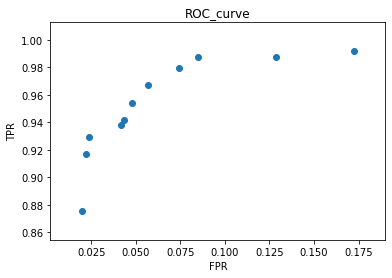

In [195]:
Yp = svm_test(X,svm_train(X,Y))                 #"""result of SVM model"""
print(Result(Y,Yp))
ROC(Y , Yp,-50,11,10)

('predictive accuracy is', 0.9313304721030042, 'f-measure is', 0.897872340425532, 'precision is', 0.9213973799126638, 'recall is', 0.8755186721991701)


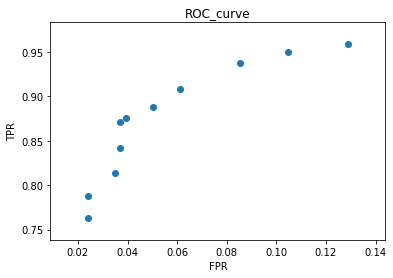

In [197]:
Ypk = K_fold(X,Y,5)                           #"""Result from cross validation with k-fold with 10 groups"""
print(Result(Y,Ypk))
ROC(Y,Ypk,-50,11,10)

C:\Users\sarthak\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
C:\Users\sarthak\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.


('predictive accuracy is', 0.9608127721335269, 'f-measure is', 0.9456740442655935, 'precision is', 0.914396887159533, 'recall is', 0.9791666666666666)


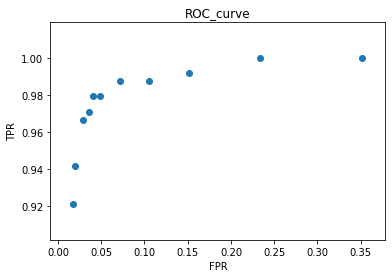

In [198]:
Ypb,Yb = boot_strap(dfb)                     #"""Result from cross validation with bootstrap method """
print(Result(Yb,Ypb))
ROC(Yb,Ypb,-50,11,10)